<div style="background-color: #ffffff; color: #000000; padding: 10px;">
<img src="../media/img/kisz_logo.png" width="192" height="69"> 
<h1> NLP Fundamentals
<h2> Working with Embeddings
</div>

<div style="background-color: #f6a800; color: #ffffff; padding: 10px;">
<h2>Part 1.3 - Visualization of embeddings
</div>

In this section we will briefly talk about the tools we will use for reducing our multidimensional embeddings into 2 or 3 dimensions, so we can visualize them.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import os
os.environ['LOKY_MAX_CPU_COUNT'] = '2'  # Change '2' to your desired number of cores

import nb_config

import warnings
warnings.filterwarnings('ignore')

from src.data import MNISTData

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>1. Overview
</div>

In the next sections we are going to introduce three different techniques for reducing the number of dimensions of our embeddings and we will show how to use them. Each technique brings its unique strengths and limitations to the table. The choice among PCA, t-SNE, and UMAP ultimately depends on the specific characteristics of the data and the goals of the analysis.

For pedagogical reasons we will show these techniques with vectors generated from tabular data, specifically from the test set of the [UCI ML hand-written digits datasets](https://archive.ics.uci.edu/dataset/80/optical+recognition+of+handwritten+digits), that can be found in SciKit-Learn. The dataset consists of a training set with 60,000 examples and a test set with 10,000 examples. Each example is a 28x28 pixel grayscale image of a handwritten digit (0 through 9), and the images are accompanied by corresponding labels indicating the actual digit they represent. We will work only with the training data and use the 28x28 pixel information for each sample as our vectors.

Our first step will be loading the dataset.

In [2]:
mnist = MNISTData()

vectors, labels = mnist.get_train_data()

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>2. Principal Component Analysis (PCA)
</div>

PCA is a dimensionality reduction technique and works by identifying the principal components (eigenvectors) that capture the most significant variance in the word embedding space. By selecting a subset of these components, it reduces the dimensionality of the word embeddings.

PCA is computationally efficient, making it suitable for large datasets and facilitating quicker analyses. Additionally, it provides a linear transformation that maximizes variance, thereby preserving the overall structure of the data. This quality makes PCA particularly effective in capturing the primary sources of variation in a dataset.

However, PCA comes with its set of limitations. Notably, it assumes linearity, making it less suitable for datasets with complex, non-linear relationships. Moreover, PCA prioritizes global structures, potentially overlooking intricate local patterns within the data. This lack of sensitivity to local relationships can be a drawback when trying to reveal finer details or clusters in the dataset.

Let's see how can we use it.

In [3]:
import pandas as pd
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
components = pca.fit_transform(vectors)

# Convert to data frame
pca_df = pd.DataFrame(data = components, columns = ['PC1', 'PC2'])
pca_df.loc[:,'Label'] = labels

# Shape and preview
print(pca_df.shape)
pca_df.head()

(60000, 3)


PC1       PC2  Label
0  0.486010  1.226174      5
1  3.967523  1.156302      0
2 -0.203332 -1.537934      4
3 -3.133832  2.381166      1
4 -1.501000 -2.864874      9

We will use now the libraries <kbd>matplotlib</kbd> and <kbd>seaborn</kbd> for plotting the new vectors and give all examples with the same label (aka number) the same color.

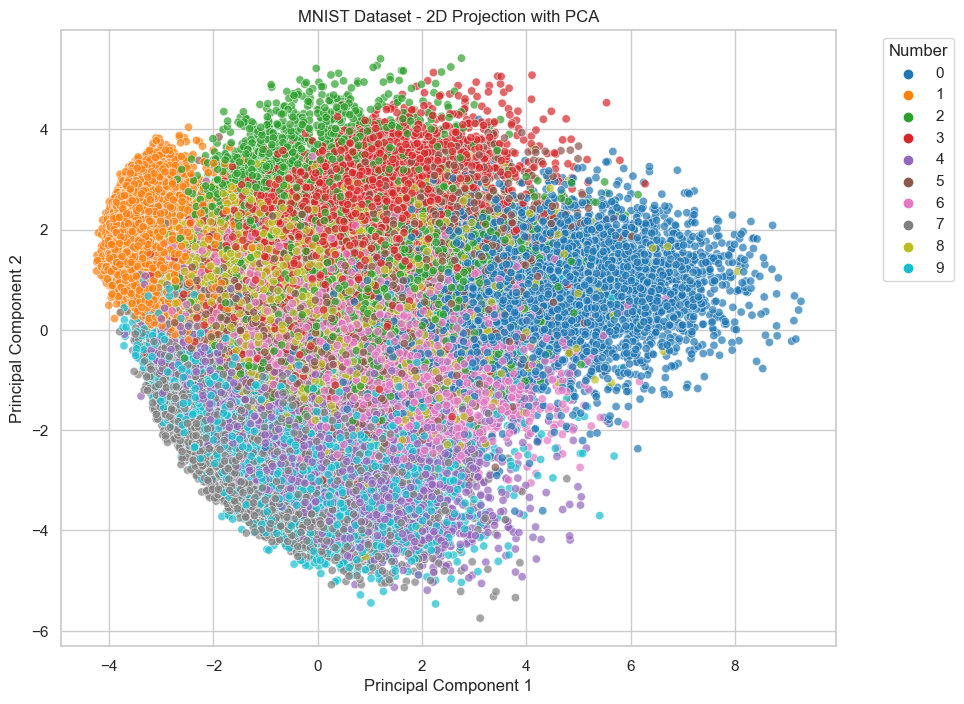

In [4]:
# Set up Seaborn with a color palette
sns.set(style="whitegrid", palette="tab10")

# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Label', data=pca_df, palette="tab10", alpha=0.7, legend='full')

# Add labels and legend
plt.title('MNIST Dataset - 2D Projection with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Number', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('../media/img/pca_2d.png', bbox_inches='tight')
plt.show();

> <details>
> <summary>If the code worked properly...</summary>
> 
> you should see something like this:
>
> ![MNIST Dataset - 2D Projection with PCA](../media/img/pca_2d.png "MNIST Dataset - 2D Projection with PCA")
> </details>


For 3D it is not very different, but this time we will plot it interactively with the library <kbd>plotly</kbd>.

In [5]:
pca = PCA(n_components=3)
components = pca.fit_transform(vectors)

pca_df = pd.DataFrame(data = components, columns = ['PC1', 'PC2', 'PC3'])
pca_df.loc[:,'Label'] = labels

# 3D scatterplot
fig = px.scatter_3d(
    pca_df, x='PC1', y='PC2', z='PC3', color='Label', opacity = 1,
    title='MNIST Dataset - 3D Projection with PCA',
    labels={'PC1': 'Principal Component 1', 'PC2': 'Principal Component 2', 'PC3': 'Principal Component 3'},
    width=1000, height=800
)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# fig.write_html('../media/html/t-sne_3d.html')
fig.show()

If you can't see the visualization you can access a saved copy in html by uncommenting the code that corresponds to your OS.

In [6]:
# Windows users:
# !start ../media/html/pca_3d.html

# iOS users:
# !open ../media/html/pca_3d.html

# Linux users:
# !xdg-open f../media/html/pca_3d.html

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>3. t-distributed Stochastic Neighbor Embedding (t-SNE)
</div>

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a dimensionality reduction technique widely employed for visualizing high-dimensional data in lower-dimensional spaces, typically 2D or 3D. t-SNE excels at revealing intricate patterns and structures within the data.

One key characteristic of t-SNE is its focus on preserving local structures, making it particularly effective in visualizing clusters and capturing the relationships between nearby data points. However, t-SNE is computationally intensive and sensitive to the choice of hyperparameters, requiring careful tuning for optimal results. Despite its computational demands, t-SNE has become a valuable tool in exploratory data analysis and pattern recognition, providing insights into the underlying structures of complex datasets.

The drawback of t-SNE lies in its computational intensity and sensitivity to hyperparameters, potentially leading to lengthy processing times and challenges in achieving optimal results.

> <details>
> <summary>But how does it work?</summary>
> 
> The underlying mechanism of t-SNE involves modeling the similarity relationships between data points in the high-dimensional space and the corresponding low-dimensional space. Initially, t-SNE defines conditional probabilities that represent pairwise similarities between points in the high-dimensional space. Subsequently, it defines similar conditional probabilities for the low-dimensional space. The algorithm then iteratively adjusts the positions of points in the low-dimensional space to minimize the discrepancy between the two sets of probabilities.
> </details>

There are a lot of implementations of this method. We will use the implementation included in the <kbd>scikit-learn</kbd> framework.

<div style="background-color: #b1063a; color: #ffffff; padding: 10px;">
<strong>WARNING</strong>:

The following code demands significant computational resources and may take considerable time to execute. For a smoother workshop experience, please avoid running the cell.
Nevertheless, We encourage you to try it at home, so you can gain insights into its functionality and processing time.
</div>




In [7]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_jobs=-1)
components = tsne.fit_transform(vectors)

# Convert to data frame
tsne_df = pd.DataFrame(data = components, columns = ['t-SNE Component 1', 't-SNE Component 2'])
tsne_df.loc[:,'Label'] = labels

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

Time to visualize the reduced embeddings, as we did before.

<div style="background-color: #b1063a; color: #ffffff; padding: 10px;">
<strong>Reminder</strong>:

Obviously, the code will not work if you didn't execute the last cell, so if this was the case don't bother trying...

> <details>
> <summary>But hey, we have you covered.</summary>
>
> That's how it should look like
> 
> ![MNIST Dataset - 2D Projection with t-SNE](../media/img/t-sne_2d.png "MNIST Dataset - 2D Projection with t-SNE")

</div>

In [ ]:
# Set up Seaborn with a color palette
sns.set(style="whitegrid", palette="tab10")

# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE Component 1', y='t-SNE Component 2', hue='Label', data=tsne_df, palette="tab10", alpha=0.7, legend='full')

# Add labels and legend
plt.title('MNIST Dataset - 2D Projection with t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Number', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('../media/img/t-sne_2d.png', bbox_inches='tight')
plt.show();

We can try now projecting the vectors into 3 dimensions with t-SNE.

<div style="background-color: #b1063a; color: #ffffff; padding: 10px;">
<strong>WARNING</strong>:

Yes, you guessed well. This is going to take even longer. So, don't try it during the workshop and keep it for home.
</div>

In [ ]:
tsne = TSNE(n_components=3)
components = tsne.fit_transform(vectors)

# Convert to data frame
tsne_df = pd.DataFrame(data = components, columns = ['t-SNE Component 1', 't-SNE Component 2', 't-SNE Component 3'])
tsne_df.loc[:,'Label'] = labels

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

And we want to visualize it too, of course. The next code would do the trick.

<div style="background-color: #b1063a; color: #ffffff; padding: 10px;">
<strong>Reminder</strong>:

Yes, the same story. Don't run the cell if you didn't run the previous one. But I guess you know that by now...

</div>

In [ ]:
# 3D scatterplot
fig = px.scatter_3d(
    tsne_df, x='t-SNE Component 1', y='t-SNE Component 2', z='t-SNE Component 3', color='Label', opacity = 1,
    title='MNIST Dataset - 3d Projection with t-SNE',
    width=1000, height=800
)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# fig.write_html('../media/html/t-sne_3d.html')
fig.show();

If you can't see the visualization or didn't run the last code cells, you can access a saved copy in html by uncommenting the code that corresponds to your OS.

In [ ]:
# Windows users:
# !start ../media/html/t-sne_3d.html

# iOS users:
# !open ../media/html/t-sne_3d.html

# Linux users:
# !xdg-open f../media/html/t-sne_3d.html

<div style="background-color: #dd6108; color: #ffffff; padding: 10px;">
<h3>4. Uniform Manifold Approximation and Projection (UMAP)
</div>



Uniform Manifold Approximation and Projection (UMAP) is a dimensionality reduction technique designed to capture both local and global structures within high-dimensional data. UMAP has gained popularity for its ability to offer a balance between preserving intricate patterns and efficiently handling computational demands.

UMAP operates by constructing a low-dimensional representation that minimizes the discrepancy between pairwise similarities in the high-dimensional and low-dimensional spaces. Notably, UMAP excels in capturing fine-grained details and preserving complex relationships, making it a valuable tool for exploratory data analysis.

Despite its strengths, UMAP, like t-SNE, requires careful consideration of hyperparameters, although it generally exhibits better scalability.

We can try it with the following code:

In [ ]:
import umap
import umap.plot
import pandas as pd

um = umap.UMAP(n_components=2)
X_fit = um.fit(vectors)
components = um.transform(vectors)

# Convert to data frame
umap_df = pd.DataFrame(data = components, columns = ['UMAP1', 'UMAP2'])
umap_df.loc[:,'Label'] = labels

# Shape and preview
print(umap_df.shape)
umap_df.head()

And now let's visualize it.

In [ ]:
# Set up Seaborn with a color palette
sns.set(style="whitegrid", palette="tab10")

# Create a scatter plot with Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Label', data=umap_df, palette="tab10", alpha=0.7, legend='full')

# Add labels and legend
plt.title('MNIST Dataset - 2D Projection with UMAP')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.legend(title='Number', bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.savefig('../media/img/umap_2d.png', bbox_inches='tight')
plt.show();

>
> <details>
> <summary>If the code worked properly...</summary>
> 
> you should see something like this:
>
> ![MNIST Dataset - 2D Projection with UMAP](../media/img/umap_2d.png "MNIST Dataset - 2D Projection with UMAP")

In order to reduce the vectors to 3 dimensions, you can use:

In [ ]:
um = umap.UMAP(n_components=3)
X_fit = um.fit(vectors)
components = um.transform(vectors)

# Convert to data frame
umap_df = pd.DataFrame(data = components, columns = ['UMAP1', 'UMAP2', 'UMAP3'])
umap_df.loc[:,'Label'] = labels

# Shape and preview
print(umap_df.shape)
umap_df.head()

Let's see how does it look like.

In [ ]:
# 3D scatterplot
fig = px.scatter_3d(
    umap_df, x='UMAP1', y='UMAP2', z='UMAP3', color='Label', opacity = 1,
    title='MNIST Dataset - 3d Projection with UMAP',
    width=1000, height=800
)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

# fig.write_html('../media/html/umap_3d.html')
fig.show()

If you can't see the visualization or didn't run the last code cells, you can access a saved copy in html by uncommenting the code that corresponds to your OS.

In [ ]:
# Windows users:
# !start ../media/html/umap_3d.html

# iOS users:
# !open ../media/html/umap_3d.html

# Linux users:
# !xdg-open f../media/html/umap_3d.html